In [1]:
# coding: utf-8
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import datasets ## imports datasets from scikit-learn

from sklearn.datasets import load_svmlight_file

mem = Memory("/cache")
mem.cache
def get_data():
    data = load_svmlight_file("C:/Users/USER/PythonProjects/ML2017-lab-01-master/DATA2/australian_scale.txt")
    print ( "house_data_shape:", data[0].shape, "----house_label_shape:" , data[1].shape)
    return data[0], data[1]   
x, y = get_data()

house_data_shape: (690, 14) ----house_label_shape: (690,)


In [3]:
# create training and testing in range (7:3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 120)

print ("Train data Shape:",x_train.shape, y_train.shape)
print ("Test data Shape:",x_test.shape, y_test.shape)



Train data Shape: (462, 14) (462,)
Test data Shape: (228, 14) (228,)


In [4]:
#definition function
def svm(W, xtrain, ytrain, xtest, ytest, reg):

  gW = np.zeros(W.shape) 
  num_classes = W.shape[1]
  train_loss = 0
  scores_train = xtrain.dot(W)  
  num_train = xtrain.shape[0]
  scores_train_correct = scores_train[np.arange(num_train), ytrain]
  scores_train_correct = np.reshape(scores_train_correct, (num_train, 1))
  margins_train = scores_train - scores_train_correct + 1.0 
  margins_train[np.arange(num_train), ytrain] = 0.0 
  margins_train[margins_train <= 0] = 0.0
  train_loss += np.sum(margins_train) / num_train
  train_loss += 0.5 * reg * np.sum(W * W) 
  margins_train[margins_train > 0] = 1.0                       
  row_sum = np.sum(margins_train, axis=1)                 
  margins_train[np.arange(num_train), ytrain] = -row_sum        
  gW += np.dot(xtrain.T, margins_train)/num_train + reg * W    
  test_loss = 0
  scores_test = xtest.dot(W) 
  num_test = xtest.shape[0]
  scores_test_correct = scores_test[np.arange(num_test), ytest] 
  scores_test_correct = np.reshape(scores_test_correct, (num_test, 1)) 
  margins_test = scores_test - scores_test_correct + 1.0 
  margins_test[np.arange(num_test), ytest] = 0.0 
  margins_test[margins_test <= 0] = 0.0
  test_loss += np.sum(margins_test) / num_test
  test_loss += 0.5 * reg * np.sum(W * W)

  return train_loss, test_loss, gW



data = get_data()
X=data[0].toarray()
Y=data[1]
Y=Y.reshape(len(Y),order='C') 
Y=Y.astype(np.int) 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=120)
N,D=x_train.shape 
C=len(list(set(y_train))) 

#initialization parameters 
W = random.random(size=(D, C)) 
Iterations=100
th = 0 
eta = 0.001 
L_train=[];
L_test=[];

for t in range(Iterations):
    y_train_pred = np.dot(x_train,W)
    y_train_pred[y_train_pred> th] = 1
    y_train_pred[y_train_pred<=th] = 0
    
    y_test_pred = np.dot(x_test,W)
    y_test_pred[y_test_pred> th] = 1
    y_test_pred[y_test_pred<=th] = 0   
    
    train_loss, test_loss, grad_W= svm(W, x_train, y_train,  x_test, y_test, reg= 0.1)
    
    L_train.append (train_loss)
    L_test.append (test_loss)

    W -= eta * grad_W





house_data_shape: (690, 14) ----house_label_shape: (690,)


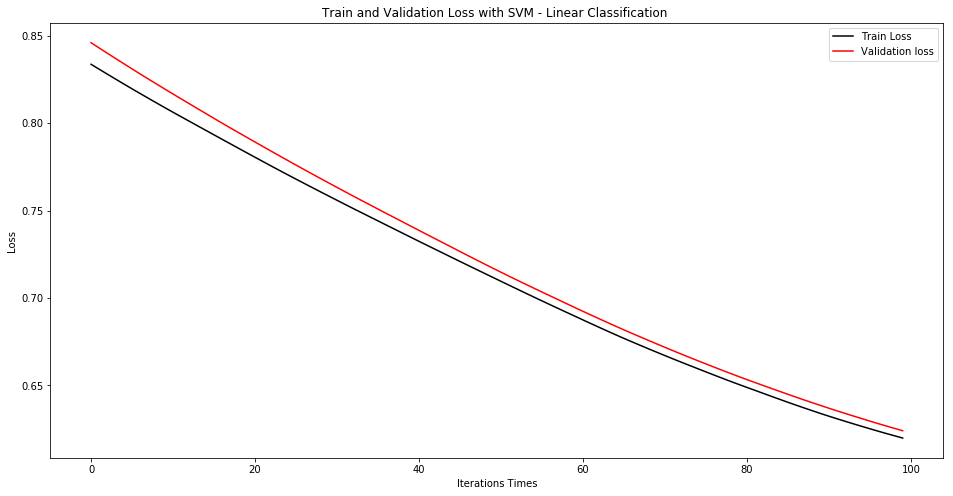

In [5]:
# give plot a title and a legend
plt.figure(figsize=(16,8))
plt.plot(L_train,'black',label='Train Loss')
plt.plot(L_test,'red',label='Validation loss')
plt.title("Train and Validation Loss with SVM - Linear Classification ") 
plt.legend()
plt.xlabel("Iterations Times")
plt.ylabel("Loss")
plt.show()

